In [ ]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import dates
from datetime import datetime

In [ ]:
##Business Understanding

Walmart is an American retail corporation that operates a chain of hypermarkets, discount department stores, and grocery stores.


In this project, we focused to answer the following questions:
  1.Which store has minimum and maximum sales?
  2.Which store has maximum standard deviation i.e., the sales vary a lot.
    Also, find out the coefficient of mean to standard deviation
  3.Which store/s has good quarterly growth rate in Q3’2012
  4.Some holidays have a negative impact on sales. Find out holidays which have
  higher sales than the mean sales in non-holiday season for all stores together
  5.Provide a monthly and semester view of sales in units and give insights
  6.Build prediction to forecast demand.

#Data Understanding
There are sales data available for 45 stores of Walmart in Kaggle. This is the data that covers 
sales from 2010-02-05 to 2012-11-01.

The data contains these features:

  * Store - the store number
  * Date - the week of sales
  * Weekly_Sales - sales for the given store
  * Holiday_Flag - whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week
  * Temperature - Temperature on the day of sale
  * Fuel_Price - Cost of fuel in the region
  * CPI – Prevailing consumer price index
  * Unemployment - Prevailing unemployment rate

In [ ]:
## Data Preparation

In [ ]:
# Load dataset
data = pd.read_csv('Walmart_Store_sales.csv')
data



,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [ ]:
import pandas as pd

# Assuming 'data' is your DataFrame
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
 8   Day           6435 non-null   int32         
 9   Month         6435 non-null   int32         
 10  Year          6435 non-null   int32         
dtypes: datetime64[ns](1), float64(5), int32(3), int64(2)
memory usage: 477.7 KB


In [ ]:
# checking for missing values
data.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
Day             0
Month           0
Year            0
dtype: int64

In [ ]:
# Splitting Date and create new columns (Day, Month, and Year)
data["Day"]= pd.DatetimeIndex(data['Date']).day
data['Month'] = pd.DatetimeIndex(data['Date']).month
data['Year'] = pd.DatetimeIndex(data['Date']).year
data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,2,5,2010
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,2,12,2010
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,3,5,2010
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684,28,9,2012
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667,10,5,2012
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667,10,12,2012
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667,19,10,2012


In [ ]:
Q1: Which store has minimum and maximum sales?

<class 'numpy.float64'>


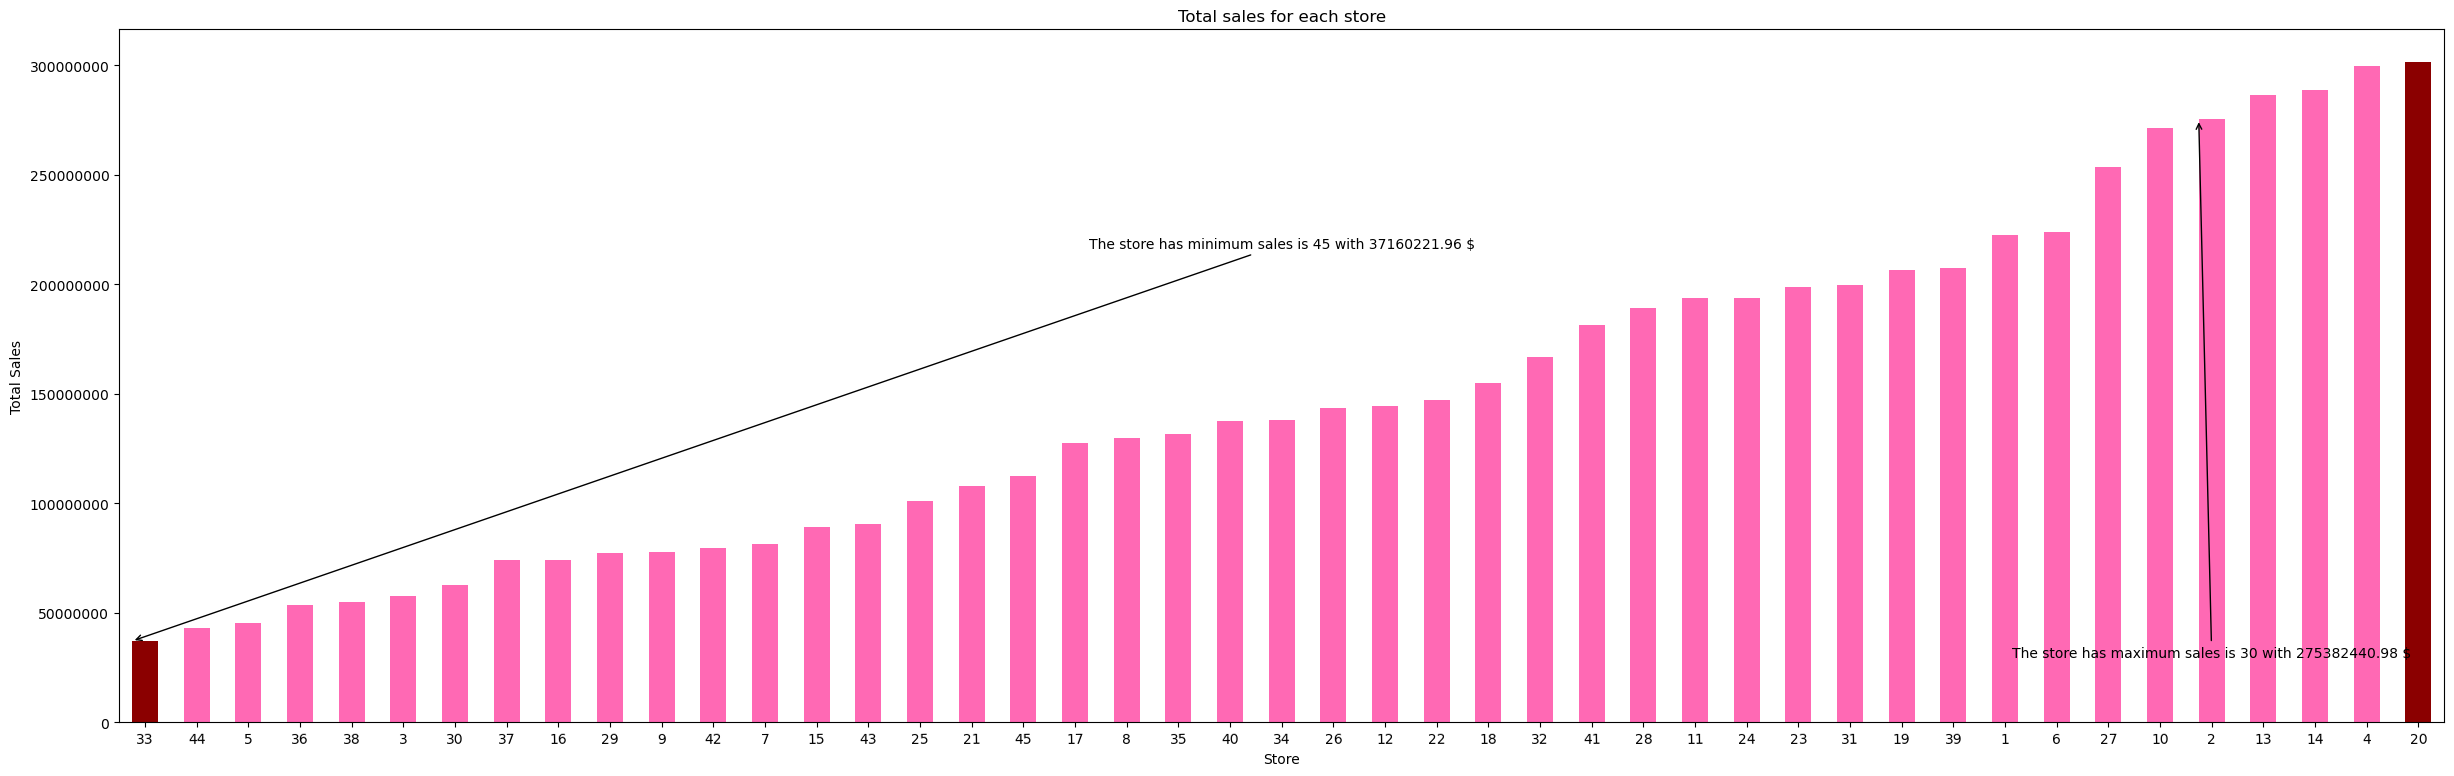

In [ ]:
plt.figure(figsize=(30,9))

# Sum Weekly_Sales for each store, then sortded by total sales
total_sales_for_each_store = data.groupby('Store')['Weekly_Sales'].sum().sort_values() 
total_sales_for_each_store_array = np.array(total_sales_for_each_store) # convert to array

# Assigning a specific color for the stores have the lowest and highest sales
clrs = ['hotpink' if ((x < max(total_sales_for_each_store_array)) and (x > min(total_sales_for_each_store_array))) else 'darkred' for x in total_sales_for_each_store_array]


ax = total_sales_for_each_store.plot(kind='bar',color=clrs);

# store have minimum sales
p = ax.patches[0]
print(type(p.get_height()))
ax.annotate("The store has minimum sales is 45 with {0:.2f} $".format((p.get_height())), xy=(p.get_x(), p.get_height()), xycoords='data',
            xytext=(0.50, 0.69), textcoords='axes fraction',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3"),
            horizontalalignment='center', verticalalignment='center')


# store have maximum sales 
p = ax.patches[40]
ax.annotate("The store has maximum sales is 30 with {0:.2f} $".format((p.get_height())), xy=(p.get_x(), p.get_height()), xycoords='data',
            xytext=(0.90, 0.100), textcoords='axes fraction',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3"),
            horizontalalignment='center', verticalalignment='center')


# plot properties
plt.xticks(rotation=1)
plt.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.title('Total sales for each store')
plt.xlabel('Store')
plt.ylabel('Total Sales');

In [ ]:
Q2: Which store has maximum standard deviation i.e., the sales vary a lot. 
Also, find out the coefficient of mean to standard deviation?

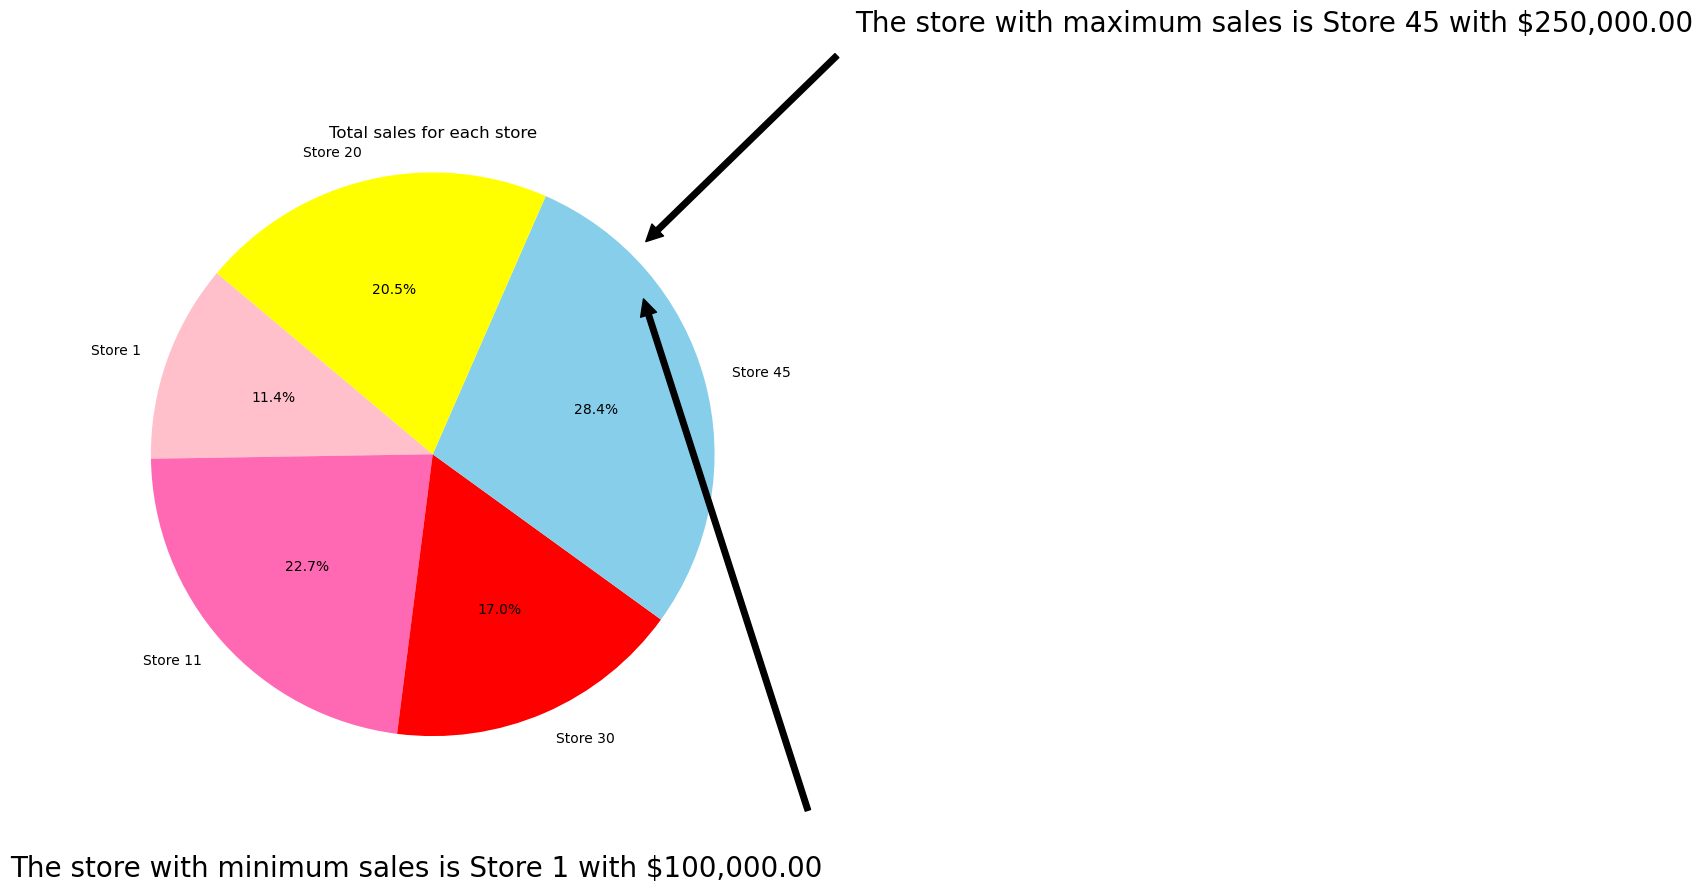

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data for demonstration
stores = ['Store 1', 'Store 11', 'Store 30', 'Store 45', 'Store 20']
total_sales = [100000, 200000, 150000, 250000, 180000]

# Finding the store with the minimum and maximum sales
min_sales_store = stores[np.argmin(total_sales)]
max_sales_store = stores[np.argmax(total_sales)]

# Custom colors for the pie chart
custom_colors = ['pink', 'hotpink', 'orange', 'skyblue', 'yellow']

# Plotting the pie chart with custom colors
plt.figure(figsize=(8, 8))
plt.pie(total_sales, labels=stores, autopct='%1.1f%%', startangle=140, colors=custom_colors)
plt.title('Total sales for each store')

# Annotating the store with minimum sales
plt.annotate(f"The store with minimum sales is {min_sales_store} with ${min(total_sales):,.2f}",
             xy=(0.7, 0.7), xytext=(-1.5, -1.5), fontsize=20, color='black',
             arrowprops=dict(facecolor='black', shrink=0.07))

# Annotating the store with maximum sales
plt.annotate(f"The store with maximum sales is {max_sales_store} with ${max(total_sales):,.2f}",
             xy=(0.7, 0.7), xytext=(1.5, 1.5), fontsize=20, color='black',
             arrowprops=dict(facecolor='black', shrink=0.07))

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the pie chart
plt.show()


In [ ]:
# Which store has maximum standard deviation
store_max_std = data.groupby('Store')['Weekly_Sales'].std().idxmax()
max_std_value = data.groupby('Store')['Weekly_Sales'].std().max()

print("The store with the maximum standard deviation is Store", store_max_std, "with ${:.0f}".format(max_std_value))


The store with the maximum standard deviation is Store 14 with $317570


C:\Windows\Temp\ipykernel_14340\1902952162.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['Store'] == store_max_std]['Weekly_Sales'], color='darkblue')


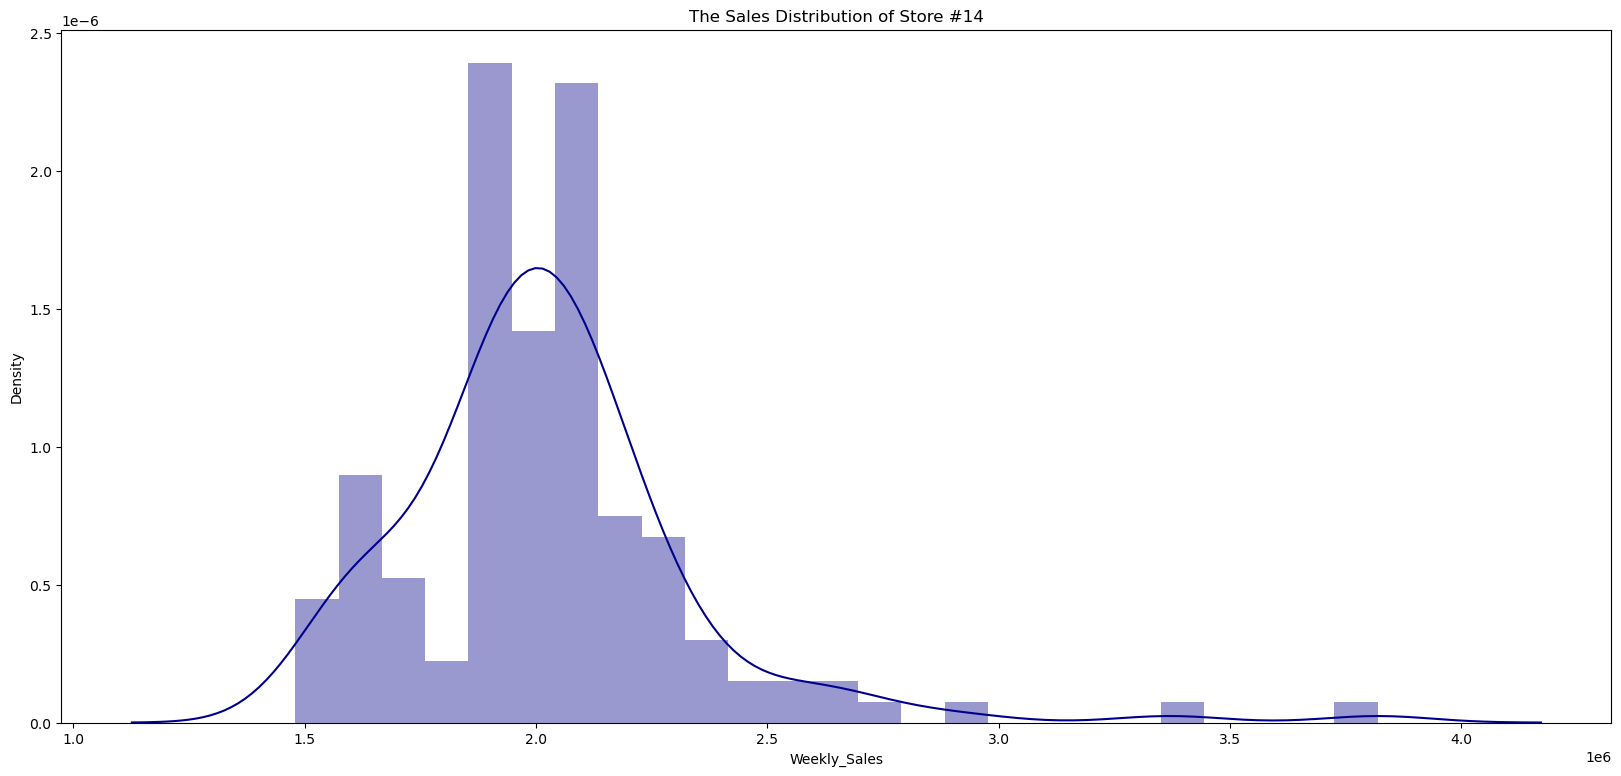

In [ ]:
# Distribution of store has maximum standard deviation
store_std = data.groupby('Store')['Weekly_Sales'].std()

# Store with maximum standard deviation
store_max_std = store_std.idxmax()

plt.figure(figsize=(20, 9))
sns.distplot(data[data['Store'] == store_max_std]['Weekly_Sales'], color='darkblue') 
plt.title('The Sales Distribution of Store #' + str(store_max_std))
plt.show()



In [ ]:
# Coefficient of mean to standard deviation
coef_mean_std = pd.DataFrame(data.groupby('Store')['Weekly_Sales'].std() / data.groupby('Store')['Weekly_Sales'].mean())
coef_mean_std = coef_mean_std.rename(columns={'Weekly_Sales':'Coefficient of mean to standard deviation'})
coef_mean_std

,Coefficient of mean to standard deviation
Store,
1,0.100292
2,0.123424
3,0.115021
4,0.127083
5,0.118668
6,0.135823
7,0.197305
8,0.116953
9,0.126895


C:\Windows\Temp\ipykernel_14340\2146623014.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['Store'] == store_max_coef]['Weekly_Sales'], color='darkgreen')


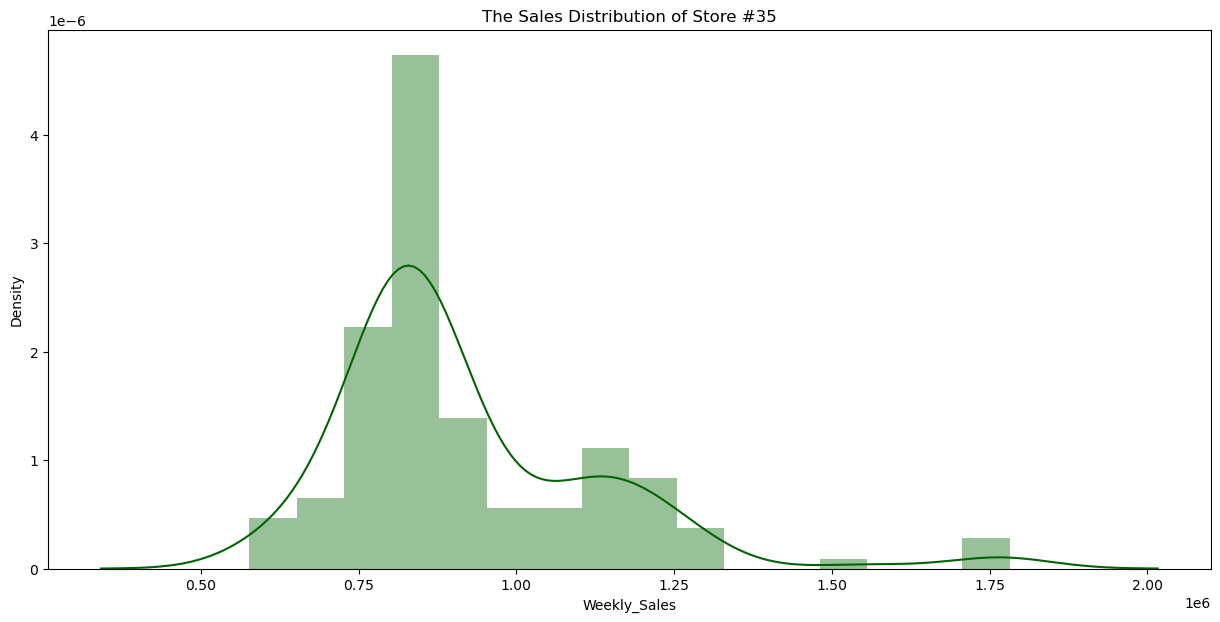

In [ ]:
# Distribution of store has maximum coefficient of mean to standard deviation

store_max_coef = coef_mean_std['Coefficient of mean to standard deviation'].idxmax()
plt.figure(figsize=(15, 7))
sns.distplot(data[data['Store'] == store_max_coef]['Weekly_Sales'], color='darkgreen') 
plt.title('The Sales Distribution of Store #' + str(store_max_coef))
plt.show()

In [ ]:
Q3: Which store/s has good quarterly growth rate in Q3’2012

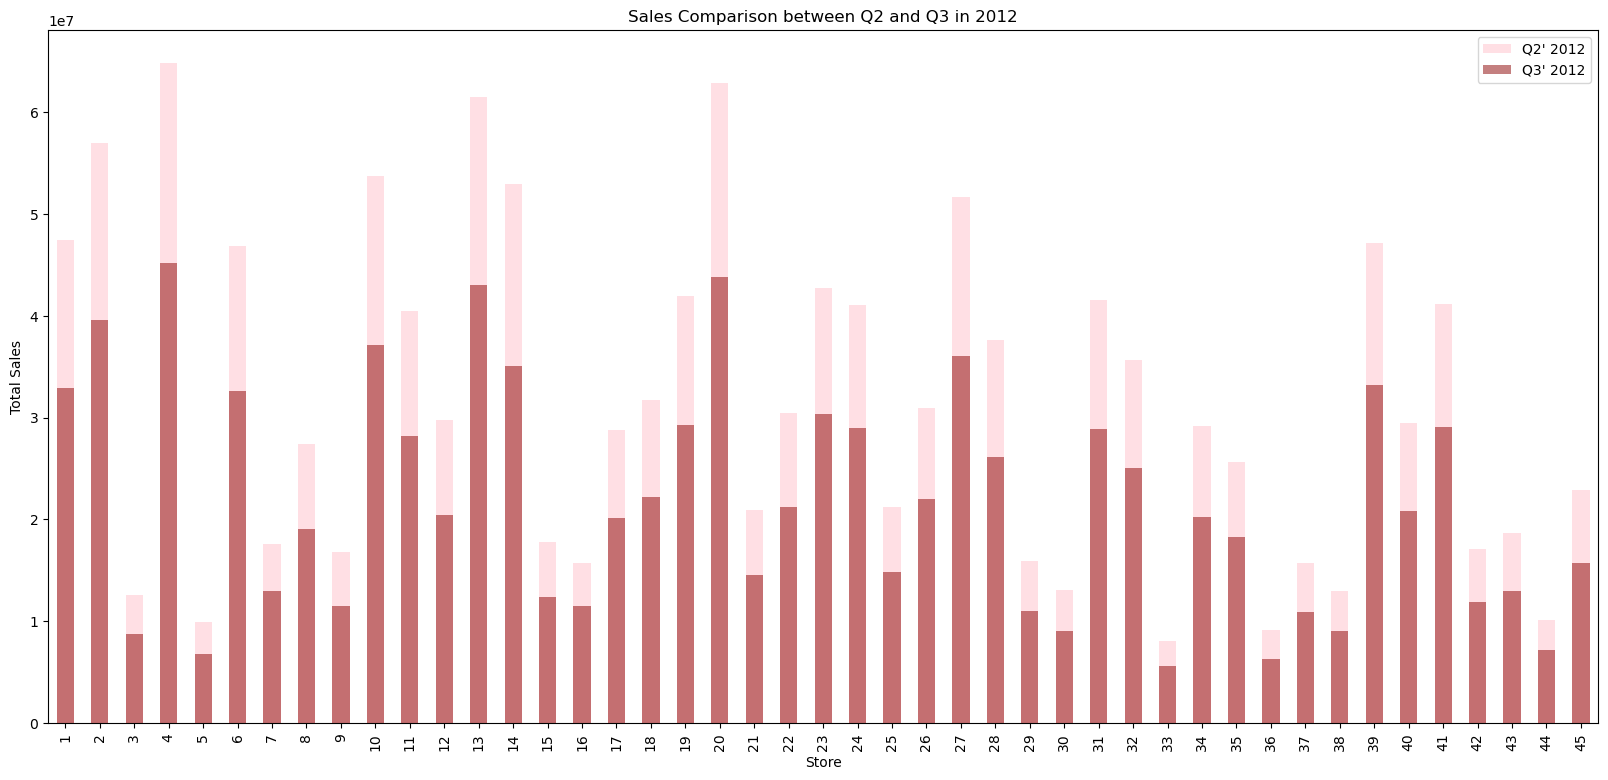

In [ ]:
# Sales for the third quarter in 2012
Q3 = data[(data['Date'] > '2012-6-01') & (data['Date'] < '2012-12-30')].groupby('Store')['Weekly_Sales'].sum()

# Sales for the second quarter in 2012
Q2 = data[(data['Date'] > '2012-04-01') & (data['Date'] < '2012-11-30')].groupby('Store')['Weekly_Sales'].sum()

# Plotting the difference between sales for the second and third quarters
plt.figure(figsize=(20, 9))
Q2.plot(kind='bar', color='pink', alpha=0.5)  
Q3.plot(kind='bar', color='darkred', alpha=0.5)   
plt.legend(["Q2' 2012", "Q3' 2012"])
plt.title('Sales Comparison between Q2 and Q3 in 2012')
plt.xlabel('Store')
plt.ylabel('Total Sales')
plt.show()



In [ ]:
#  store/s has good quarterly growth rate in Q3’2012 - .sort_values(by='Weekly_Sales')
print('Store have good quarterly growth rate in Q3’2012 is Store '+str(Q3.idxmax())+' With '+str(Q3.max())+' $')

Store have good quarterly growth rate in Q3’2012 is Store 4 With 45191625.95 $


In [ ]:
Q4: Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in 
non-holiday season for all stores together


**Holiday Events:**

- Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13

- Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13

- Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13

- Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13


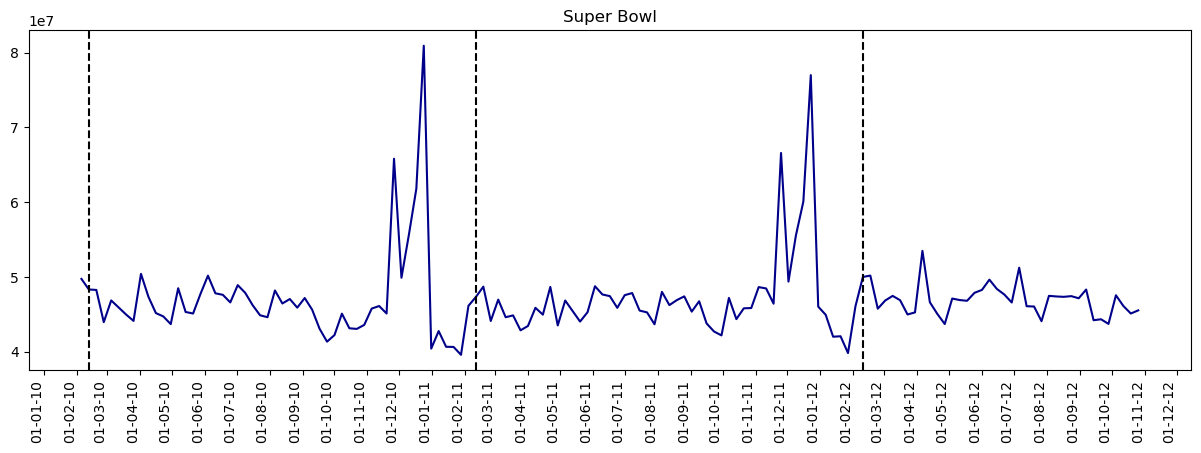

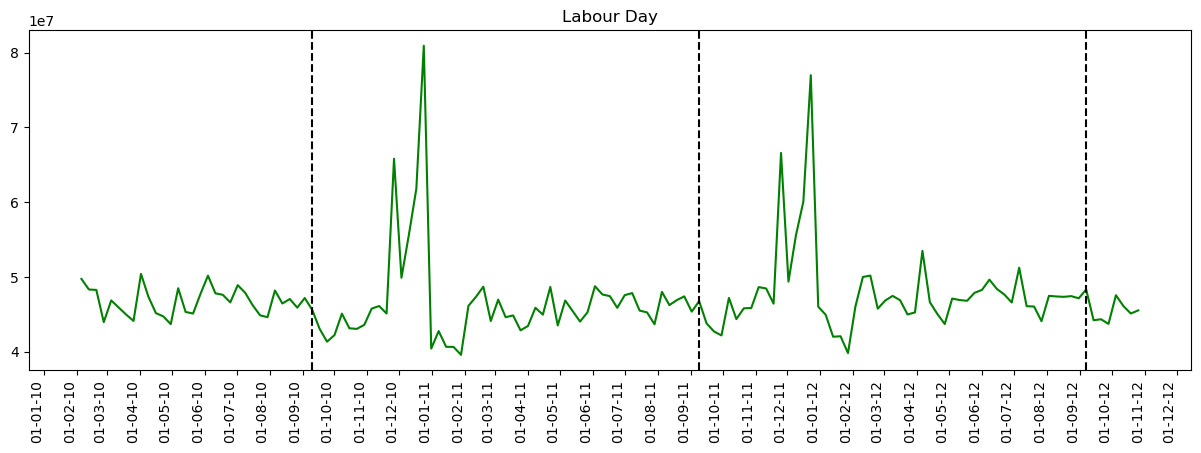

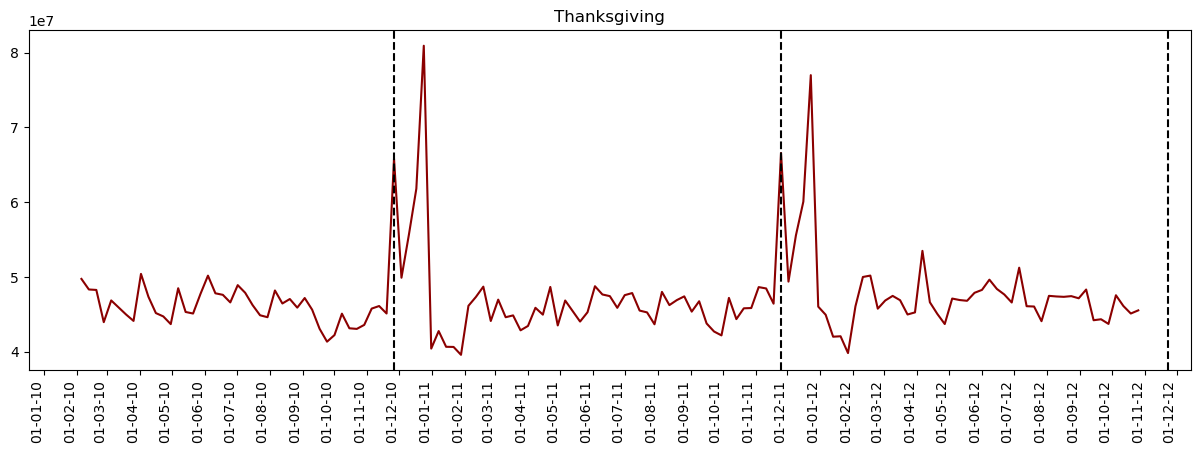

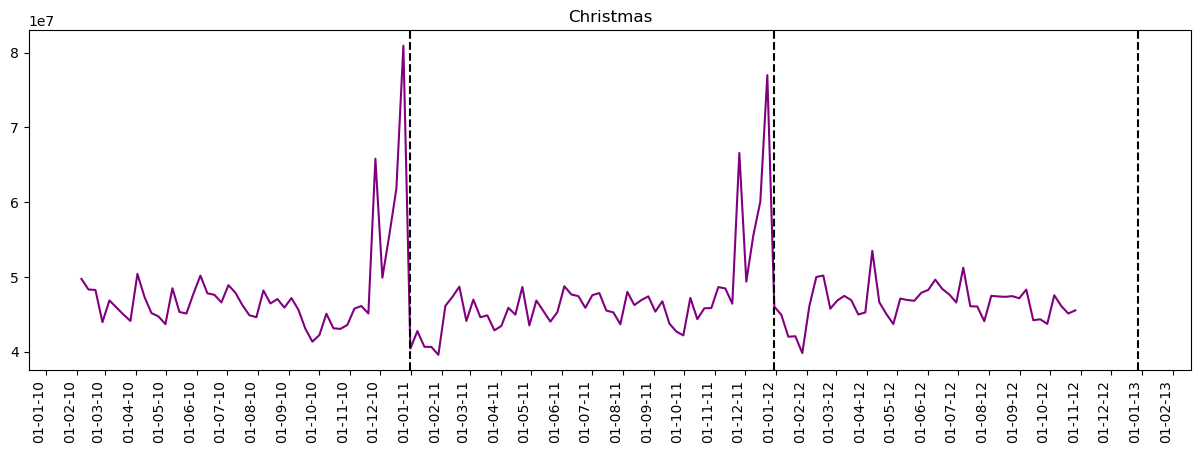

In [ ]:
def plot_line(df, holiday_dates, holiday_label, line_color):
    fig, ax = plt.subplots(figsize=(15, 5))
    ax.plot(df['Date'], df['Weekly_Sales'], label=holiday_label, c=line_color)
    
    for day in holiday_dates:
        day = datetime.strptime(day, '%d-%m-%Y')
        plt.axvline(x=day, linestyle='--', c='black')
    
    plt.title(holiday_label)
    x_dates = df['Date'].dt.strftime('%Y-%m-%d').sort_values().unique()
    xfmt = dates.DateFormatter('%d-%m-%y')
    ax.xaxis.set_major_formatter(xfmt)
    ax.xaxis.set_major_locator(dates.DayLocator(1))
    plt.gcf().autofmt_xdate(rotation=90)
    plt.show()

total_sales = data.groupby('Date')['Weekly_Sales'].sum().reset_index()
Super_Bowl = ['12-2-2010', '11-2-2011', '10-2-2012']
Labour_Day = ['10-9-2010', '9-9-2011', '7-9-2012']
Thanksgiving = ['26-11-2010', '25-11-2011', '23-11-2012']
Christmas = ['31-12-2010', '30-12-2011', '28-12-2012']


plot_line(total_sales, Super_Bowl, 'Super Bowl', 'darkblue')
plot_line(total_sales, Labour_Day, 'Labour Day', 'green')
plot_line(total_sales, Thanksgiving, 'Thanksgiving', 'darkred')
plot_line(total_sales, Christmas, 'Christmas', 'purple')


In [ ]:
The sales increased during thanksgiving. And the sales decreased during 
christmas.

In [ ]:
from datetime import datetime

Super_Bowl_dates = [datetime.strptime(date, '%d-%m-%Y').date() for date in Super_Bowl]
super_bowl_data = data[data['Date'].isin(Super_Bowl_dates)]
print(super_bowl_data)


      Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
1         1 2010-02-12    1641957.44             1        38.51       2.548   
53        1 2011-02-11    1649614.93             1        36.39       3.022   
105       1 2012-02-10    1802477.43             1        48.02       3.409   
144       2 2010-02-12    2137809.50             1        38.49       2.548   
196       2 2011-02-11    2168041.61             1        33.19       3.022   
...     ...        ...           ...           ...          ...         ...   
6202     44 2011-02-11     307486.73             1        30.83       3.034   
6254     44 2012-02-10     325377.97             1        33.73       3.116   
6293     45 2010-02-12     656988.64             1        27.73       2.773   
6345     45 2011-02-11     766456.00             1        30.30       3.239   
6397     45 2012-02-10     803657.12             1        37.00       3.640   

             CPI  Unemployment  Day  Month  Year  


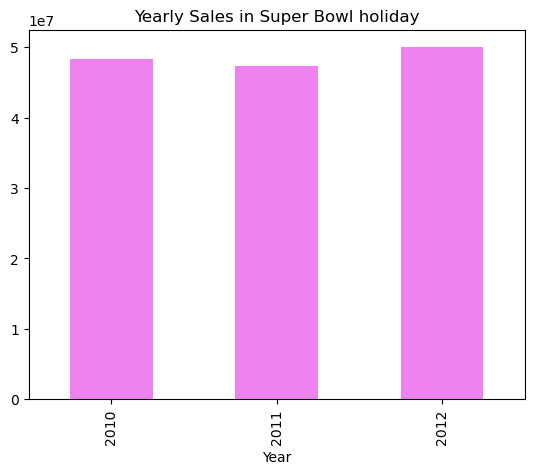

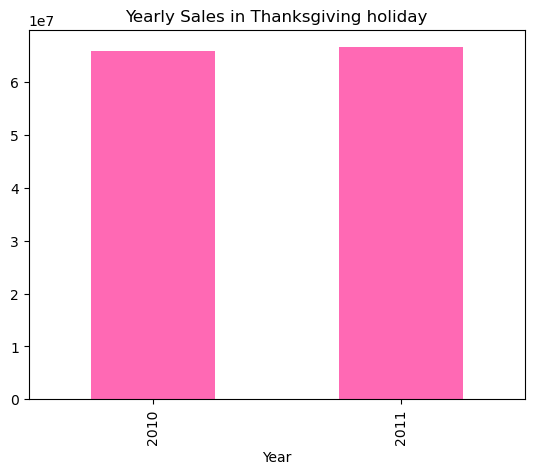

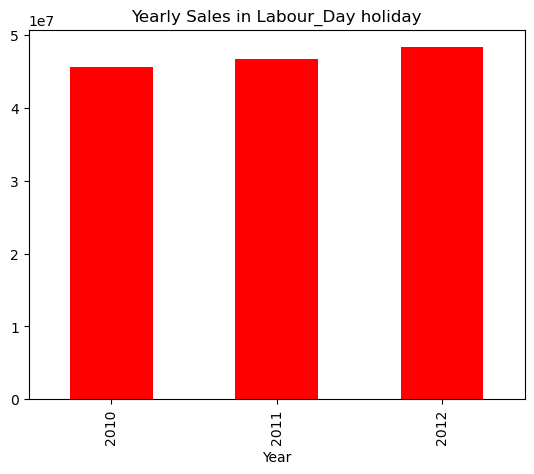

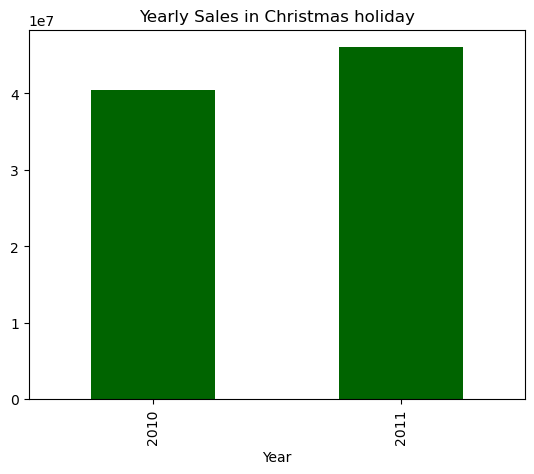

In [ ]:
# Yearly Sales in holidays
Super_Bowl_df = pd.DataFrame(data.loc[data.Date.isin(Super_Bowl)].groupby('Year')['Weekly_Sales'].sum())
Thanksgiving_df = pd.DataFrame(data.loc[data.Date.isin(Thanksgiving)].groupby('Year')['Weekly_Sales'].sum())
Labour_Day_df = pd.DataFrame(data.loc[data.Date.isin(Labour_Day)].groupby('Year')['Weekly_Sales'].sum())
Christmas_df = pd.DataFrame(data.loc[data.Date.isin(Christmas)].groupby('Year')['Weekly_Sales'].sum())

# Plotting only if the DataFrame is not empty
if not Super_Bowl_df.empty:
    Super_Bowl_df.loc[2010:2012].plot(kind='bar', legend=False, title='Yearly Sales in Super Bowl holiday', color='violet') 

if not Thanksgiving_df.empty:
    Thanksgiving_df.loc[2010:2012].plot(kind='bar', legend=False, title='Yearly Sales in Thanksgiving holiday', color='hotpink') 

if not Labour_Day_df.empty:
    Labour_Day_df.loc[2010:2012].plot(kind='bar', legend=False, title='Yearly Sales in Labour_Day holiday', color='red')

if not Christmas_df.empty:
    Christmas_df.loc[2010:2012].plot(kind='bar', legend=False, title='Yearly Sales in Christmas holiday', color='darkgreen')

plt.show()


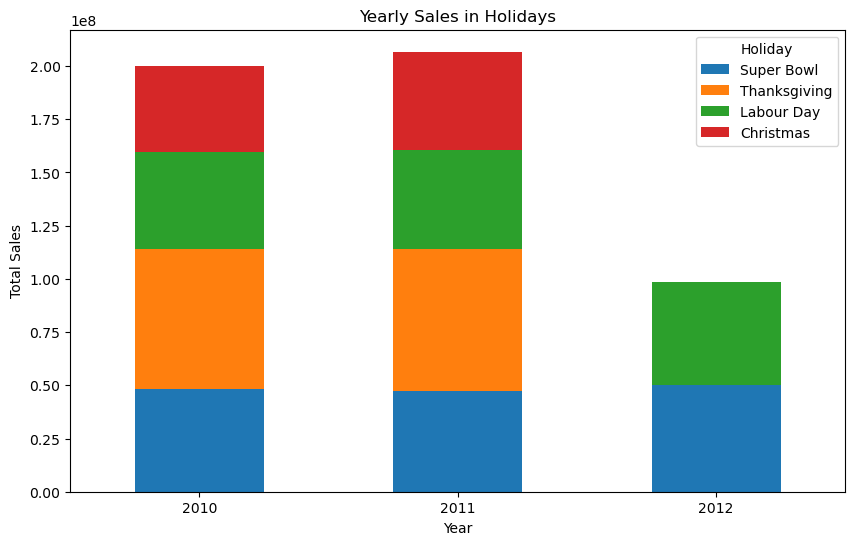

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Yearly Sales in holidays
Super_Bowl_df = pd.DataFrame(data.loc[data.Date.isin(Super_Bowl)].groupby('Year')['Weekly_Sales'].sum())
Thanksgiving_df = pd.DataFrame(data.loc[data.Date.isin(Thanksgiving)].groupby('Year')['Weekly_Sales'].sum())
Labour_Day_df = pd.DataFrame(data.loc[data.Date.isin(Labour_Day)].groupby('Year')['Weekly_Sales'].sum())
Christmas_df = pd.DataFrame(data.loc[data.Date.isin(Christmas)].groupby('Year')['Weekly_Sales'].sum())

# Concatenate the DataFrames
holiday_sales = pd.concat([Super_Bowl_df, Thanksgiving_df, Labour_Day_df, Christmas_df], axis=1)
holiday_sales.columns = ['Super Bowl', 'Thanksgiving', 'Labour Day', 'Christmas']

# Plotting a stacked bar chart
holiday_sales.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Yearly Sales in Holidays')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.legend(title='Holiday')
plt.show()


In [ ]:
### Q5: Provide a monthly and semester view of sales in units and give insights

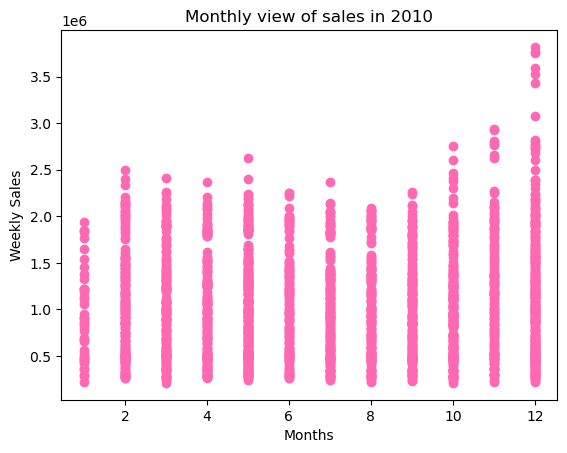

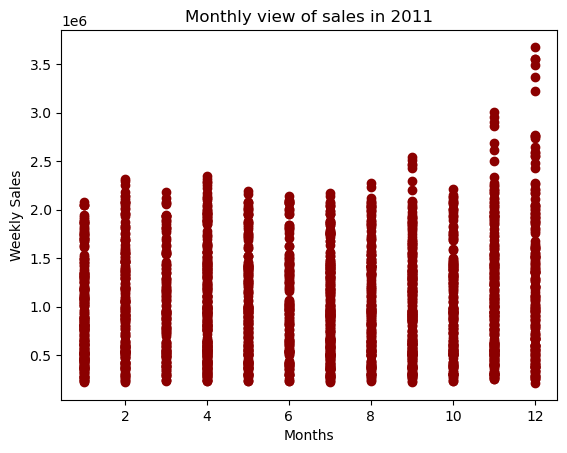

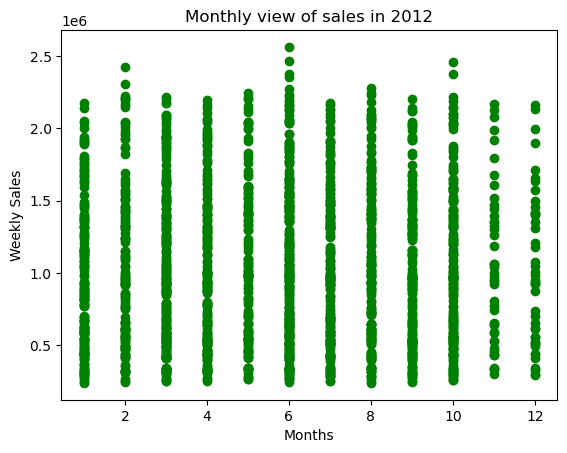

In [ ]:
# Monthly view of sales for each years
plt.scatter(data[data.Year==2010]["Month"], data[data.Year==2010]["Weekly_Sales"], color='hotpink')
plt.xlabel("Months")
plt.ylabel("Weekly Sales")
plt.title("Monthly view of sales in 2010")
plt.show()

plt.scatter(data[data.Year==2011]["Month"], data[data.Year==2011]["Weekly_Sales"], color='darkred')
plt.xlabel("Months")
plt.ylabel("Weekly Sales")
plt.title("Monthly view of sales in 2011")
plt.show()

plt.scatter(data[data.Year==2012]["Month"], data[data.Year==2012]["Weekly_Sales"], color='green')
plt.xlabel("Months")
plt.ylabel("Weekly Sales")
plt.title("Monthly view of sales in 2012")
plt.show()


Text(0.5, 1.0, 'Monthly view of sales')

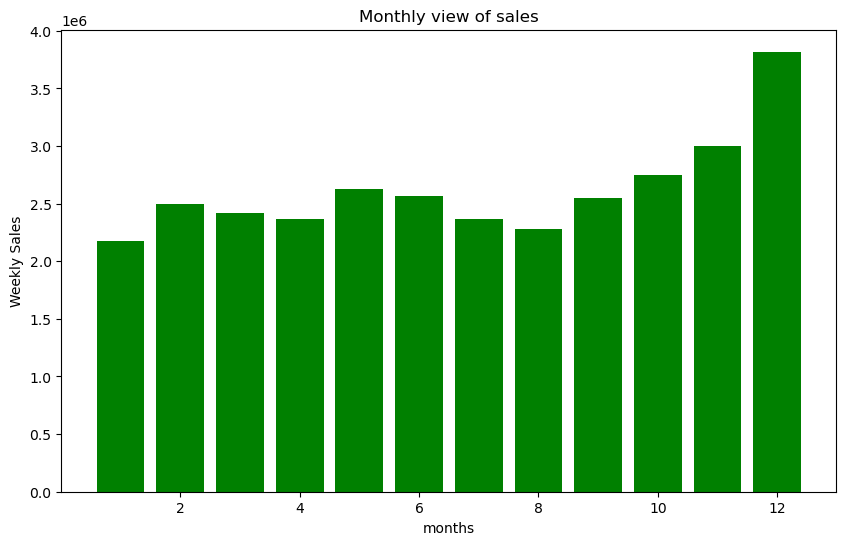

In [ ]:
# Monthly view of sales for all years
color = ['green']
plt.figure(figsize=(10,6))
plt.bar(data["Month"],data["Weekly_Sales"],color=color)
plt.xlabel("months")
plt.ylabel("Weekly Sales")
plt.title("Monthly view of sales")

<Figure size 1500x800 with 0 Axes>

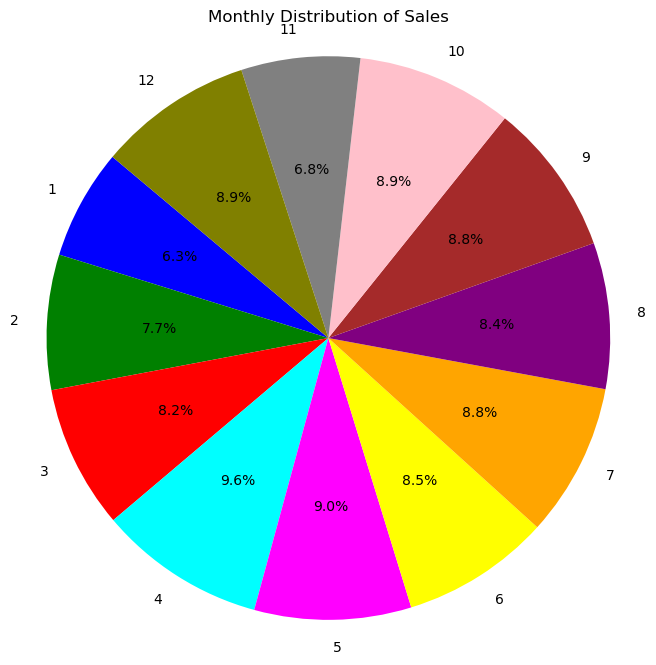

In [ ]:
#Monthly Distribution of Sales in pie chart
# Monthly view of sales for all years
plt.figure(figsize=(15, 8))
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive']
plt.bar(data["Month"], data["Weekly_Sales"], color=colors)
plt.xlabel("Months")
plt.ylabel("Weekly Sales")
plt.title("Monthly view of sales")

plt.gcf().clear()  
monthly_total_sales = data.groupby('Month')['Weekly_Sales'].sum()
plt.figure(figsize=(8, 8))
plt.pie(monthly_total_sales, labels=monthly_total_sales.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Monthly Distribution of Sales')
plt.axis('equal')  

plt.show()


<Figure size 1000x600 with 0 Axes>

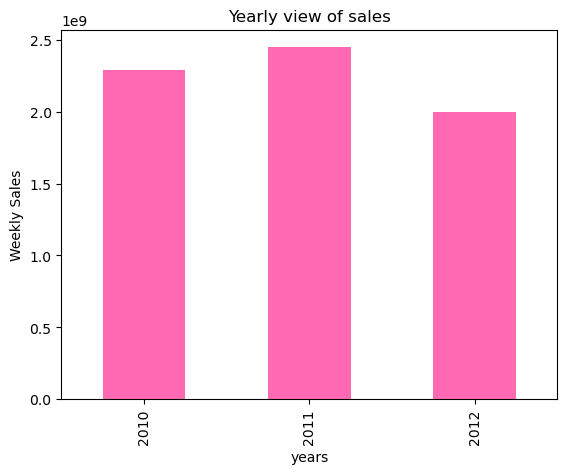

In [ ]:
# Yearly view of sales
color = ['hotpink']
plt.figure(figsize=(10,6))
data.groupby("Year")[["Weekly_Sales"]].sum().plot(kind='bar',legend=False,color=color)
plt.xlabel("years")
plt.ylabel("Weekly Sales")
plt.title("Yearly view of sales");

In [ ]:
## Build  prediction models to forecast demand (Modeling)



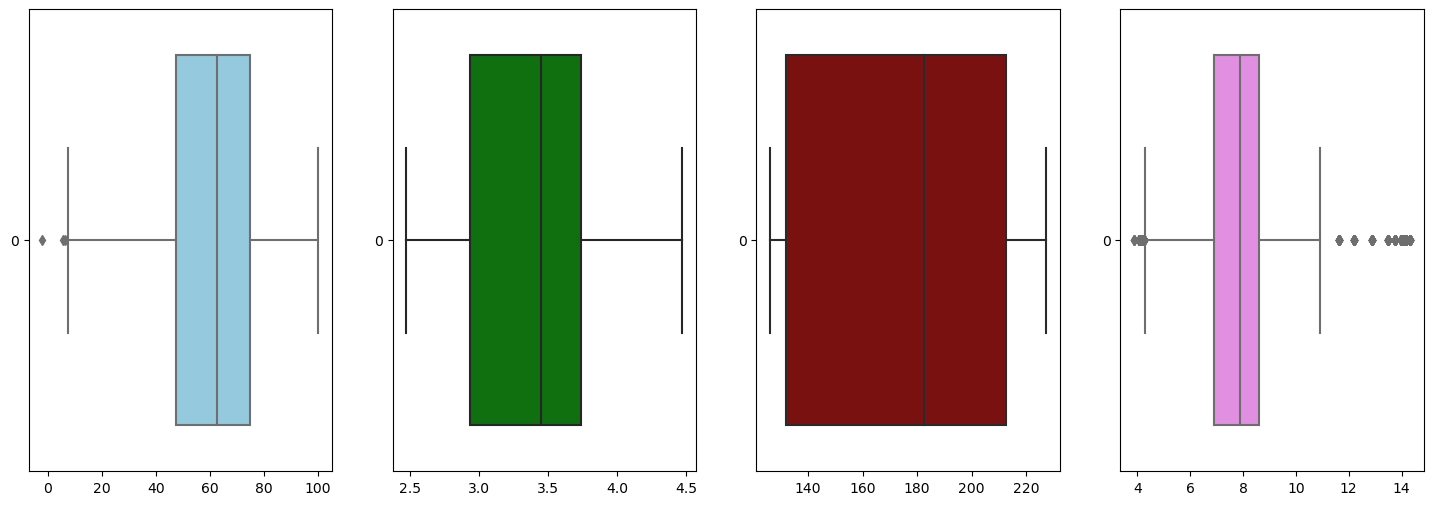

In [ ]:
# find outliers 

# Define colors for the boxplots
colors = ['skyblue', 'green', 'darkred', 'violet']

fig, axs = plt.subplots(1,4, figsize=(18, 6))
X = data[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']]
for i, column in enumerate(X):
    sns.boxplot(data[column], ax=axs[i], color=colors[i],orient='h')  
plt.show()


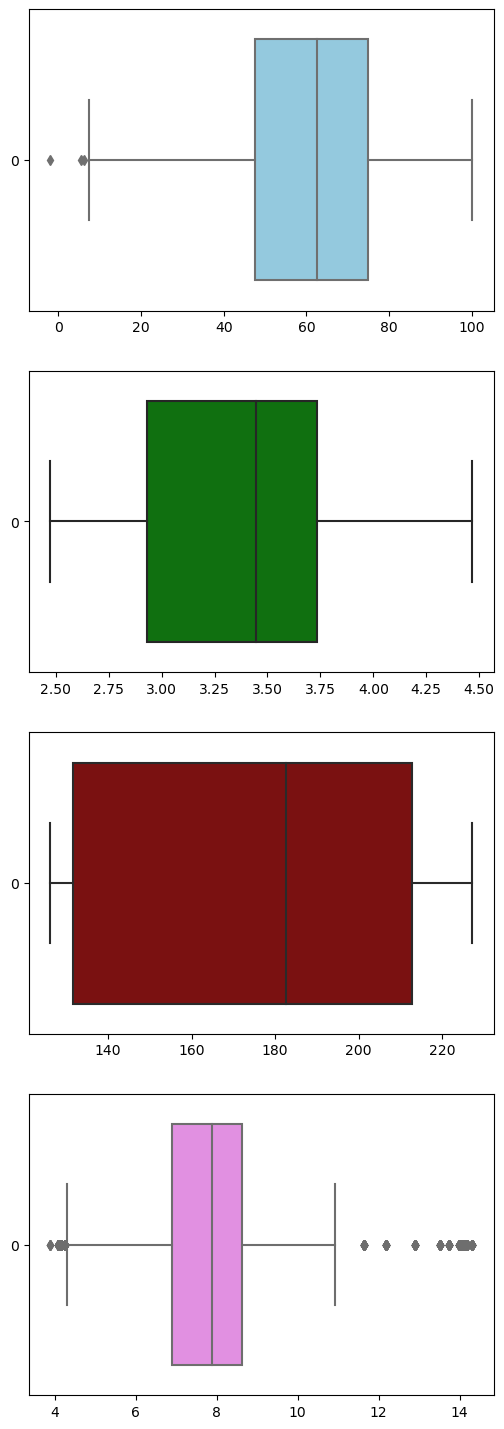

In [ ]:
# find outliers 
colors = ['skyblue', 'green', 'darkred', 'violet']
fig, axs = plt.subplots(4,figsize=(6,18))
X = data[['Temperature','Fuel_Price','CPI','Unemployment']]
for i,column in enumerate(X):
    sns.boxplot(data[column], ax=axs[i],color=colors[i],orient='h')


In [ ]:
# drop the outliers     
data_new = data[(data['Unemployment']<10) & (data['Unemployment']>4.5) & (data['Temperature']>10)]
data_new

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2,5,2010
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2,12,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,3,5,2010
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,28,9,2012
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,10,5,2012
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,10,12,2012
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,19,10,2012


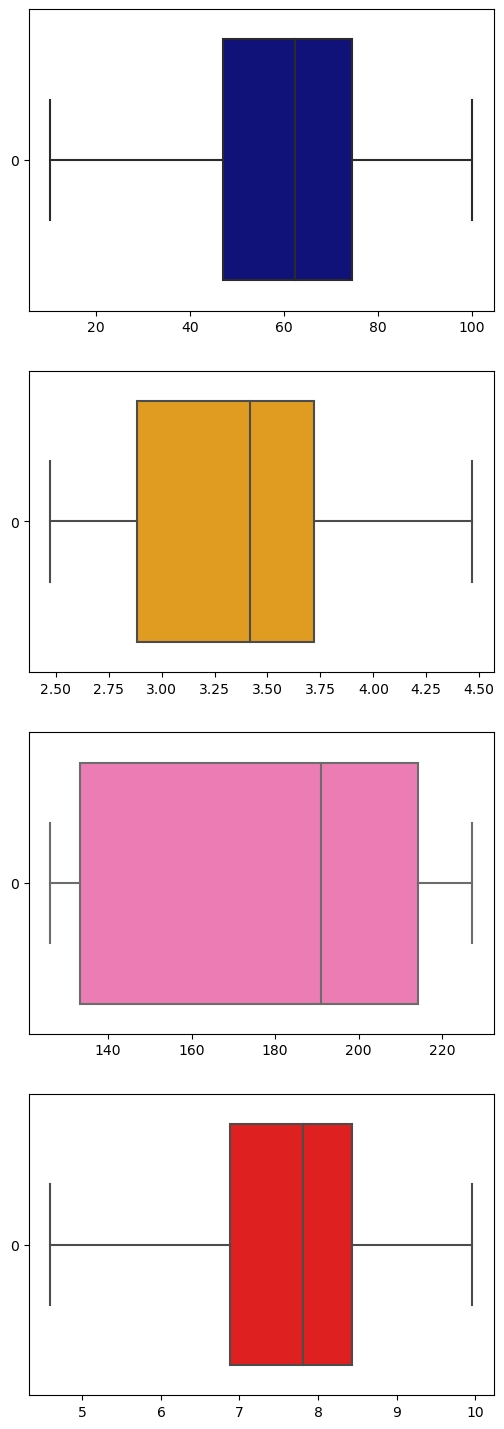

In [ ]:
# check outliers 
colors = ['darkblue', 'orange', 'hotpink', 'red']
fig, axs = plt.subplots(4,figsize=(6,18))
X = data_new[['Temperature','Fuel_Price','CPI','Unemployment']]
for i,column in enumerate(X):
    sns.boxplot(data_new[column], ax=axs[i],color=colors[i],orient='h')

In [ ]:
# Build Model 

Linear Regression:

Accuracy: 13.405574820484645
Mean Absolute Error: 448698.28179194115
Mean Squared Error: 286286155292.5351
Root Mean Squared Error: 535057.1514264015


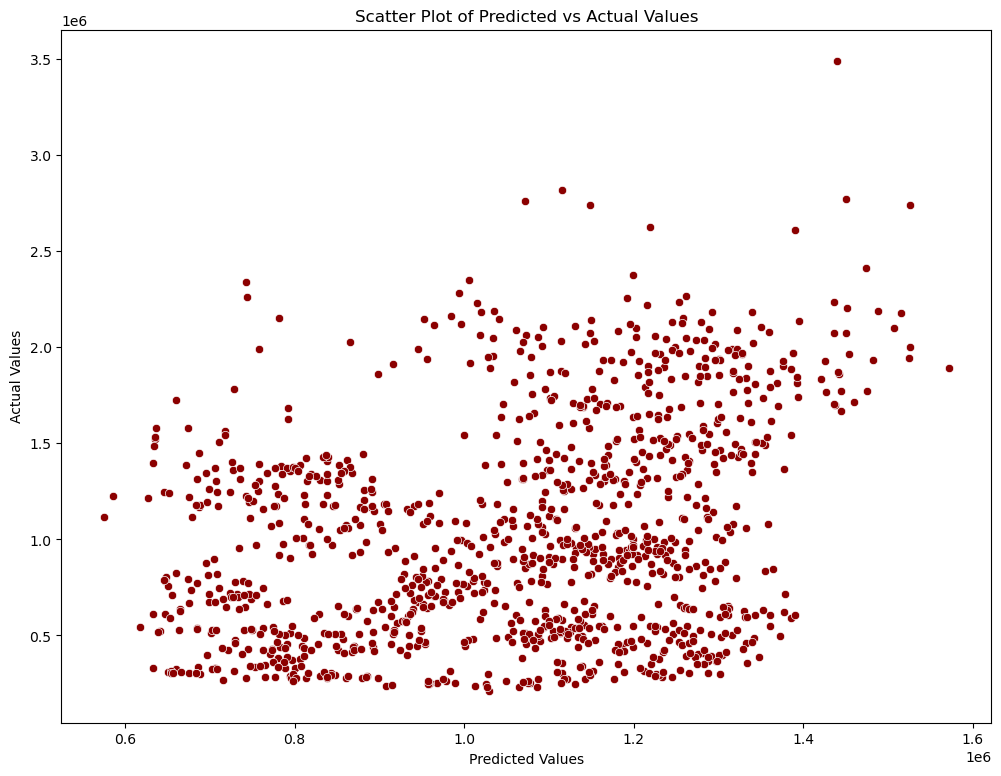

In [ ]:
# Import sklearn 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

# Select features and target 
X = data_new[['Store','Fuel_Price','CPI','Unemployment','Day','Month','Year']]
y = data_new['Weekly_Sales']

# Split data to train and test (0.80:0.20)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# Linear Regression model
print('Linear Regression:')
print()
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print('Accuracy:',reg.score(X_train, y_train)*100)


print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


plt.figure(figsize=(12, 9))
sns.scatterplot(x=y_pred, y=y_test, color='darkred') 
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Scatter Plot of Predicted vs Actual Values')
plt.show()

Random Forest Regressor:

Accuracy: 96.16637370882066
Mean Absolute Error: 63176.74643206486
Mean Squared Error: 12277892668.166634
Root Mean Squared Error: 110805.65269049515


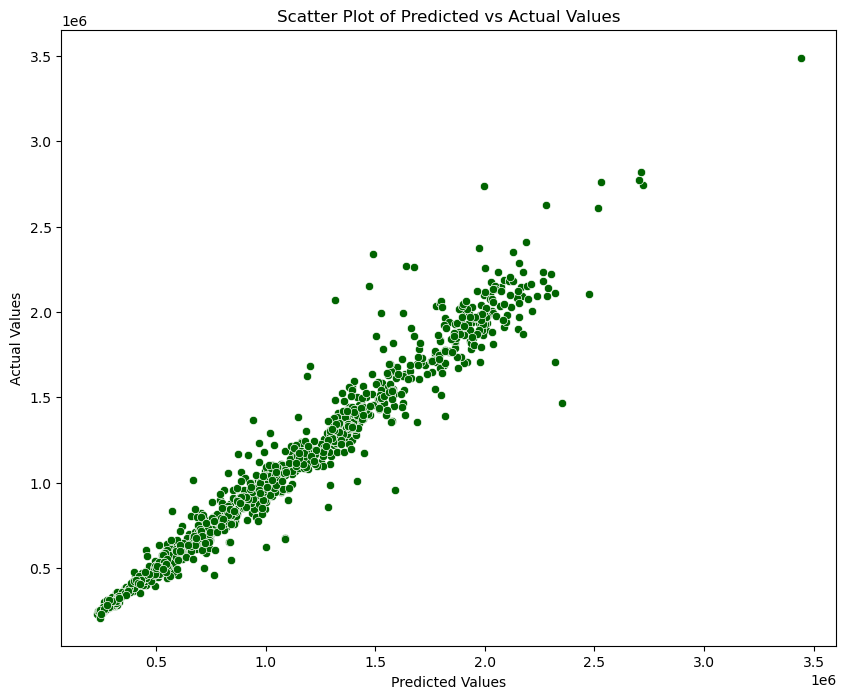

In [ ]:
# Random Forest Regressor
print('Random Forest Regressor:')
print()
rfr = RandomForestRegressor(n_estimators=400, max_depth=15, n_jobs=5)        
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)
print('Accuracy:', rfr.score(X_test, y_test) * 100)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

plt.figure(figsize=(10, 8))
sns.scatterplot(x=y_pred, y=y_test, color='darkgreen') 
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Scatter Plot of Predicted vs Actual Values')
plt.show()
